In [73]:
from photutils import DAOStarFinder, CircularAperture, aperture_photometry
from astropy.io import fits as fits
from astropy.stats import mad_std
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frames_in_set = 10
object_sets = 12
star_sets = 6
dark_sets = 7

object_frames = object_sets * frames_in_set
star_frames = star_sets * frames_in_set
dark_frames = dark_sets * frames_in_set
flat_frames = 40

x = 1039
y = 1391

path_raw = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Initial_Frames/'
path_clean = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Cleaned_Frames/'
path_comb = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Combined_Frames/'

In [52]:
with fits.open(path_raw + 'object_1.fit') as hdul:
    data = hdul[0].data
    
print(hdul[0].header['DATE-OBS'])
print(hdul[0].header['DATE-OBS'][11:13])

2019-02-26T21:20:46
21
[76905.5, 77054.5, 77203.5, 77988.5, 78137.5, 78286.5, 78845.5, 78994.5, 79457.5, 79605.5, 80095.5, 80243.5]


In [55]:
time = []
start_day = '26'

for j in range(object_sets):
    with fits.open(path_raw + 'object_' + str((j+1)*10-9) + '.fit') as hdul:
        hours = 3600 * int(hdul[0].header['DATE-OBS'][11:13])
        mins = 60 * int(hdul[0].header['DATE-OBS'][14:16])
        secs = int(hdul[0].header['DATE-OBS'][17:19])
        if hdul[0].header['DATE-OBS'][8:10] != start_day:
            hours += 86400
        time_start = hours + mins + secs
        
    with fits.open(path_raw + 'object_' + str((j+1)*10-1) + '.fit') as hdul:
        hours = 3600 * int(hdul[0].header['DATE-OBS'][11:13])
        mins = 60 * int(hdul[0].header['DATE-OBS'][14:16])
        secs = int(hdul[0].header['DATE-OBS'][17:19])
        if hdul[0].header['DATE-OBS'][8:10] != start_day:
            hours += 86400
        time_end = hours + mins + secs
        
    time.append((time_start + time_end) / 2)
    
time_begin = time[0]
for j in range(object_sets):
    time[j] -= time_begin

In [41]:
ast_x = 386.61
ast_y = 589.04
coord_ast = np.sqrt(ast_x**2 + ast_y**2)
brightness_ast = []

for j in range(object_sets):
    with fits.open(path_comb + 'object' + '_' + str(j+1) + '.fit') as hdul:
        data = hdul[0].data
        
    FWHM = 10
    std = mad_std(data)
    daofind = DAOStarFinder(fwhm = FWHM, threshold = 22*std)
    sources = daofind(data)
    
    diff = 1000000
    if j == 6:
        ast_x = 345.91
        ast_y = 281.95
        coord_ast = coord_ast = np.sqrt(ast_x**2 + ast_y**2)
    for k in range(sources['flux'].size):
        coord = np.sqrt(sources['xcentroid'][k]**2 + sources['ycentroid'][k]**2)
        if abs(coord_ast - coord) < diff: 
            diff = abs(coord_ast - coord)
            index = k
            
    ast_x = sources['xcentroid'][index]
    ast_y = sources['ycentroid'][index]
    coord_ast = np.sqrt(ast_x**2 + ast_y**2)
    brightness_ast.append(sources['flux'][index])

In [43]:
print(brightness_ast)
print(max(sources['flux']))

[20.175319163865712, 18.45605510379619, 21.151905155568695, 15.490045738146604, 8.092227187606609, 5.51075299195626, 10.05008836334808, 27.206000464473124, 20.08969476174169, 18.367956758942068, 18.973122483558498, 16.527256654257247]
88.42896179051071


In [45]:
brightness_star = []

for j in range(star_sets):
    with fits.open(path_comb + 'star' + '_' + str(j+1) + '.fit') as hdul:
        data = hdul[0].data
        
    FWHM = 10
    std = mad_std(data)
    daofind = DAOStarFinder(fwhm = FWHM, threshold = 22*std)
    sources = daofind(data)
    max_flux = max(sources['flux'])
    
    diff = 1000000
    for k in range(sources['flux'].size):
        if abs(sources['flux'][k] - max_flux) < diff: 
            diff = abs(sources['flux'][k] - max_flux)
            index = k
            
    brightness_star.append(sources['flux'][index])

In [46]:
print(brightness_star)

[39.60922955376084, 57.01421353604385, 49.548547281440676, 54.253009169826676, 48.99505210482402, 60.042818221118104]


In [47]:
comp_factor = []
for element in brightness_star:
    comp_factor.append(element/brightness_star[0])
    
print(comp_factor)

brightness_corr = []
for j in range(star_sets):
    brightness_corr.append(brightness_ast[2*j]/comp_factor[j])
    brightness_corr.append(brightness_ast[2*j+1]/comp_factor[j])
    
print(brightness_corr)

[1.0, 1.4394173827253964, 1.2509343867491638, 1.369706247282344, 1.2369604927135476, 1.515879478029815]
[20.175319163865712, 18.45605510379619, 14.694768459388497, 10.761330190981655, 6.468946152032876, 4.40530938339396, 7.337404193993143, 19.862653410870383, 16.24117736991784, 14.84926710848127, 12.516247339279122, 10.902751105079728]


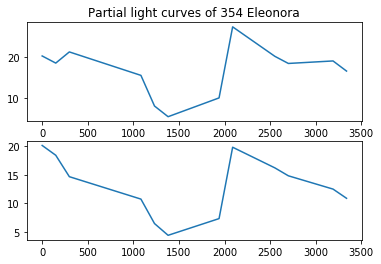

In [61]:
plt.subplot(211)
plt.plot(time, brightness_ast)
plt.title('Partial light curves of 354 Eleonora')

plt.subplot(212)
plt.plot(time, brightness_corr)

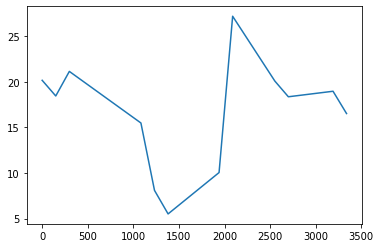

In [56]:
x_axis = []
for j in range(object_sets):
    x_axis.append(j)
    
plt.plot(time, brightness_ast)

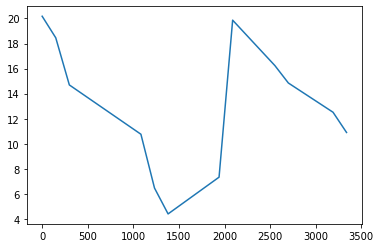

In [57]:
plt.plot(time, brightness_corr)

In [44]:
with fits.open(path_comb + 'object_12.fit') as hdul:
    data = hdul[0].data
    std = mad_std(data)
    
FWHM = 10

daofind = DAOStarFinder(fwhm = FWHM, threshold = 22*std)
sources = daofind(data)
for col in sources.colnames:
    sources[col].info.format = '%.5g'
print(sources)

 id xcentroid ycentroid sharpness roundness1 ... npix sky  peak   flux    mag   
--- --------- --------- --------- ---------- ... ---- --- ------ ------ --------
  1    4.6164    4.5524   0.29476   -0.16082 ...  169   0 1370.4 6.3734  -2.0109
  2    1384.5    4.6018   0.28402    0.14263 ...  169   0 1388.8 6.3838  -2.0127
  3    581.82     16.93   0.52676    0.19173 ...  169   0 2058.3 2.0579 -0.78356
  4     240.6    21.955   0.54174    0.22546 ...  169   0 2027.4 2.0087  -0.7573
  5    360.25    179.73   0.38859    0.41088 ...  169   0 6404.4 16.527  -3.0455
  6    56.167     475.7   0.44833    0.26102 ...  169   0 2357.2 3.0752  -1.2197
  7    572.47    502.27   0.40532    0.24882 ...  169   0  28879 88.429  -4.8665
  8    823.08    656.38   0.39849    0.23065 ...  169   0  13469 38.182  -3.9547
  9    957.37    886.96   0.35724    0.29977 ...  169   0 1774.7 1.3277 -0.30772
 10    364.65    922.81   0.34248    0.25311 ...  169   0 1993.6 2.1368 -0.82443
 11     4.595    1033.4   0.

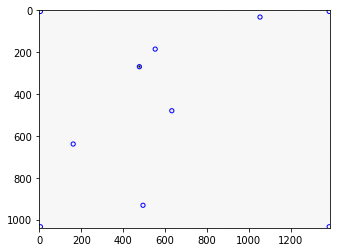

In [40]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=FWHM)
plt.imshow(data, cmap = 'Greys')
apertures.plot(color = 'blue')

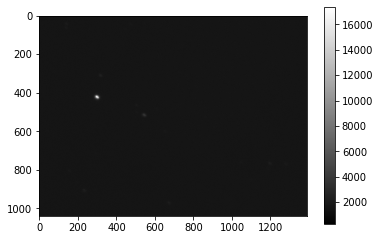

In [7]:
data = fits.getdata(path_comb + 'star_1.fit')
plt.figure()
plt.imshow(data, cmap = 'gray')
plt.colorbar()

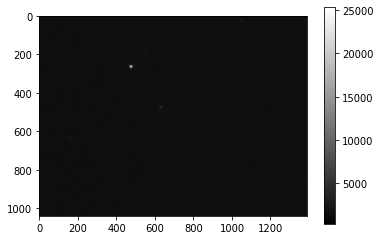

In [8]:
data = fits.getdata(path_raw + 'star_60.fit')
plt.figure()
plt.imshow(data, cmap = 'gray')
plt.colorbar()

In [44]:
star_x = 477.56
star_y = 268.67
coord_star = np.sqrt(star_x**2 + star_y**2)
brightness = []
diff = 1000000

for j in range(sources['flux'].size):
    coord = np.sqrt(sources['xcentroid'][j]**2 + sources['ycentroid'][j]**2)
    if abs(coord_star - coord) < diff: 
        diff = abs(coord_star - coord)
        index = j
        
#star_x = sources['xcentroid'][index]
#star_y = sources['ycentroid'][index]
#coord_star = np.sqrt(star_x**2 + star_y**2)
brightness.append(sources['flux'][index])
        
print(index)
print(brightness)

4
[60.042818221118104]


In [67]:
path_raw = 'C:/Users/Calum/Documents/My Documents/354_Eleonora_Flyby2/Simulated_Data/Image_Frames/'

with fits.open(path_raw + 'Pic' + '_' + str(j+1) + '.fit') as hdul:
    data = hdul[0].data
        
FWHM = 10
std = mad_std(data)
daofind = DAOStarFinder(fwhm = FWHM, threshold = 22*std)
sources = daofind(data)
for col in sources.colnames:
    sources[col].info.format = '%.5g'

print(sources)

 id xcentroid ycentroid sharpness roundness1 ... sky  peak   flux     mag   
--- --------- --------- --------- ---------- ... --- ------ ------ ---------
  1    4.6445    4.5518   0.21969   -0.22073 ...   0 1006.9 1.0294  -0.03145
  2    1385.5    4.5257   0.34042    0.17357 ...   0 1161.2 1.0671 -0.070531
  3    237.06    132.99   0.46518 -0.0015484 ...   0  11721 1.5741  -0.49259
  4    152.44    162.29   0.36019   -0.01472 ...   0 9297.6 3.1693   -1.2524
  5     499.9    400.03   0.33142  -0.014221 ...   0  10992 1.7234  -0.59098
  6    104.12    679.47   0.49069   0.056798 ...   0 9364.5  1.332  -0.31124
  7     145.2    819.61   0.47881   0.031371 ...   0 6670.1 1.1566  -0.15792
  8    4.4924    1033.3   0.30008    0.22362 ...   0 1107.2 1.0473  -0.05016


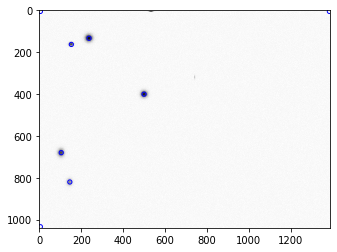

In [63]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=FWHM)
plt.imshow(data, cmap = 'Greys')
apertures.plot(color = 'blue')

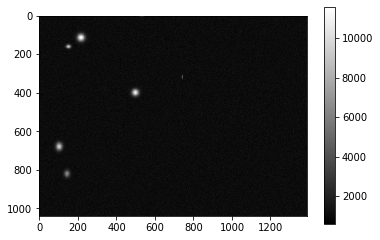

In [66]:
data = fits.getdata(path_raw + 'Pic_1.fit')
plt.figure()
plt.imshow(data, cmap = 'gray')
plt.colorbar()